In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('World_Happiness_2019_dataset.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
m = len(df['Score'])
X = df.iloc[:,3:]
y = df.iloc[:,2]
Theta = np.zeros((7,1))

mu = X.mean()
sigma = X.std()

X = (X - mu)/sigma
X = np.append(np.ones((m,1)), X, axis = 1)
y = y[:,np.newaxis]


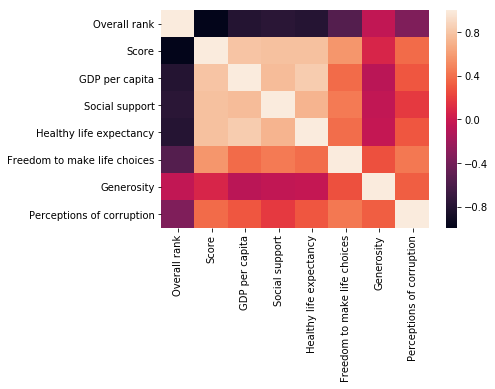

In [5]:
corr = df.corr()
sns.heatmap(corr)

In [7]:
def feature_norm(X,mu,sigma):
    m_new = len(X)
    X_new = (X - mu) / sigma
    X_new = np.append(np.ones((m_new,1)) ,X, axis = 1)
    return X_new

In [8]:
def cost_function(X, y, Theta):
    h_theta = np.dot(X,Theta)
    j_theta = (1/(2*m)) * np.sum( (h_theta - y) ** 2 )
    return j_theta
cost_function(X, y, Theta)

15.233891060897436

In [9]:
def gradient_descent(X, y, Theta, alpha, iterations):
    cost = []
    for i in range(iterations):
        h_theta = np.dot(X,Theta)
        j_val = np.dot(X.T, (h_theta - y))
        Theta = Theta - ( (alpha/m) * j_val )
        cost.append(cost_function(X, y, Theta))
    return Theta, cost
Theta, cost = gradient_descent(X, y, Theta, 0.01, 10000)
print(Theta.shape)

(7, 1)


Text(0.5,1,'Convergence Test')

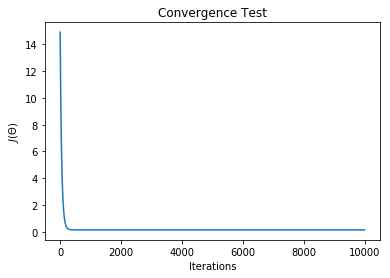

In [10]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title("Convergence Test")

In [11]:
def predict(X):
    predict = np.dot(X,Theta)
    return predict

In [12]:
t = df.iloc[:3,3:]
t_new = feature_norm(t,mu,sigma)
pred = predict(t_new)

In [13]:
pred

array([[6.77970161],
       [6.79623336],
       [6.83688562]])